# Prob No4 - Hurdle rate for investment calculations

In [19]:
import pandas as pd
import numpy as np
import random 
from scipy import linalg
import math
import matplotlib.pyplot as plt
import scipy.stats

In [20]:
dataset = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/R/datasett_bus_surv_no3.csv"
folderFig = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/Artikkel"

In [21]:
df = pd.read_csv(dataset, sep=",", engine='python')


In [42]:
# df.drop(['navn', 'orgnr_foretak', 'f_postnr', 'sn07_1'], axis=1, inplace=True)
df['orgnr'] = df['orgnr']-random.randint(1,1000)
df['orgnr_foretak'] = df['orgnr_foretak']-random.randint(1,1000)
df['employ'] = df['employ']+random.randint(1,15)
df.head()


,orgnr,orgnr_foretak,sector,bof_nace07,inves_fou,inves_fou_sale,inves_facilities,inves_facilities_sale,inves_plot,inves_plot_sale,...,no171,nnmerge,_merge,woMerge,invest_share,maint_invest,dividendratio,profitratio,mach_build,_est_no21
0,811280516,811280836,2100.0,16.232000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,1,NaN,0,0.000000,-5.655974,1,1
1,812749726,812750046,2100.0,16.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,1,NaN,1,0.000123,6.764232,1,1
2,816063776,816064096,2100.0,21.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,1,31.53125,1,0.000121,1.205634,1,1
3,829094256,829094576,2100.0,23.610001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,1,NaN,1,0.000000,-4.339672,1,1
4,832009006,832009326,2100.0,30.120001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1,1,NaN,0,0.000000,-29.164217,1,1


In [22]:
df.drop(['navn1'], axis=1, inplace=True)

In [23]:
df.isnull().describe()

,orgnr,orgnr_foretak,sector,bof_nace07,inves_fou,inves_fou_sale,inves_facilities,inves_facilities_sale,inves_plot,inves_plot_sale,...,beta47_7,beta47_8,beta47_9,beta47_10,beta47_11,beta47_12,beta47_cut_13,beta47_cut_14,beta47_cut_15,beta47_cut_16
count,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
unique,1,1,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
freq,243,243,228,228,228,228,228,228,228,228,...,243,243,243,243,243,243,243,243,243,243


In [24]:
# list of explanatory variables, important to stack the variables and estimated parametes in the same order
explanatoryNo4 = ['smallcap' ,'largecap'  ,'subsidary' ,'equityFunding' ,'debtFunding']
# ['higheduc', 'smallcap','largecap', 'mach_build_share', 'invest_share' ,'maint_invest', 'subsidary', 'no2_1', 'no2_2']

# make a new df
df_short4 = df.copy(deep=True)

In [25]:
df_short4=df_short4.loc[:,explanatoryNo4].dropna(axis=0, how='any')
df_short4.sample(5)

,smallcap,largecap,subsidary,equityFunding,debtFunding
76,0,0,1,1,0
115,0,1,0,1,1
96,0,1,0,1,1
195,0,0,1,1,1
140,0,0,1,1,1


In [26]:
# df_short.dropna(axis=0, how='any', inplace=True)
X_4 = df_short4.values


In [27]:
df_short4.describe()
# X_4[1]

,smallcap,largecap,subsidary,equityFunding,debtFunding
count,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.395062,0.160494,0.353909,0.884774,0.609053
std,0.489873,0.367821,0.479168,0.319954,0.488970
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# #  "smallcap largecap  subsidary no2_1 no2_2 sensitivity  mach_build debt_asset ebit_margin xcon xmach xengy"
#      | beta41_1    beta41_2    beta41_3   beta41_4   beta41_5    beta41_6   beta41_7   beta41_8    beta41_9   beta41~0   beta41_11   bet~1_12 |
#      |----------------------------------------------------------------------------------------------------------------------------------------|
#   1. | .5583491   -.6509179   -.2371583   .1558211   .6339461   -.7041392   .0121409   .2595911   -.0635699   .1299973   -.1579525   .3490071 |
#      +--------------------------------------------------------------------------------------------------------------------------------------+
#      |  beta42_1   beta42_2   beta42_3    beta42_4   beta42_5   beta42_6   beta42_7   beta42_8   beta42_9   beta42_10   bet~2_11   bet~2_12 |
#      |--------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.1752246   .2656968   1.012598   -.2219651   .2811295   .7874478   .9268455   .4593472   .0286289   -.0458653   .8022574   .4928869 |
#      +--------------------------------------------------------------------------------------------------------------------------------------+
#      |  beta43_1   beta43_2   beta43_3   beta43_4   beta43_5   beta43_6   beta43_7   beta43_8   beta43_9   beta43_10   bet~3_11   beta43_12 |
#      |--------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.1991488   .1991078   1.137998   .6865239   .6031976   .6144443   .7316628   .1903868   .1248696   -.1962999   .5047632   -.0572932 |
#      +--------------------------------------------------------------------------------------------------------------------------------------+
#      |  beta44_1   beta44_2   beta44_3    beta44_4   beta44_5   beta44_6   beta44_7   beta44_8    beta44_9   beta44~0   bet~4_11   bet~4_12 |
#      |--------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.3514093   .1112311   .9871286   -.3634594   .4158539   1.510688   .6871861   .5103543   -.3954107   .3423718   1.086825   .5941063 |
#      |--------------------------------------------------------------------------------------------------------------------------------------|
#      |  beta45_1   beta45_2   beta45_3    beta45_4   beta45_5   beta45_6   beta45_7   beta45_8    beta45_9   beta45~0   bet~5_11   bet~5_12 |
#      |--------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.1620108   .8691799   1.034423   -.0578522   .6903791   .8684888   .8753986   .3721771   -.6144677   .3344762   .9781537     .24714 |
#      +--------------------------------------------------------------------------------------------------------------------------------------+
#      |  beta46_1   beta46_2   beta46_3   beta46_4   beta46_5   beta46_6   beta46_7   beta46_8   beta46_9   beta46~0   bet~6_11   bet~6_12 |
#      |------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.2868276   .7446719   .7748893   .0202318   .6116514   .8995271    .409184   .9466532   .1591462   .2994379   .9318266   .7027069 |
#      +------------------------------------------------------------------------------------------------------------------------------------+
#      |  beta47_1   beta47_2   beta47_3   beta47_4    beta47_5   beta47_6   beta47_7   beta47_8   beta47_9   beta47~0   bet~7_11   bet~7_12 |
#      |-------------------------------------------------------------------------------------------------------------------------------------|
#   1. | -.0051477    .878206   .8617119   .2571655   -.0083703   .5486679   .3854356   .9504772   .3378456   .0801254   1.094837   .7913368 |

   

In [29]:
beta_1_4 = ([ .5583491 ,  -.6509179 ,  -.2371583 ,  .1558211 ,  .6339461 ])
beta_2_4 = ([-.1752246 ,  .2656968  , 1.012598  , -.2219651  , .2811295  ])
beta_3_4= ([-.1991488  , .1991078   ,1.137998  , .6865239  , .6031976])
beta_4_4 = ([ -.3514093,   .1112311  , .9871286 ,  -.3634594,   .4158539  ])
beta_5_4= ([-.1620108  , .8691799  , 1.034423  , -.0578522  , .6903791])
beta_6_4 = ([-.2868276  , .7446719  , .7748893 ,  .0202318  , .6116514 ])
beta_7_4 = ([-.0051477 ,   .878206  , .8617119 ,  .2571655 ,  -.0083703 ])

In [30]:
beta_1_4, beta_4_4


([0.5583491, -0.6509179, -0.2371583, 0.1558211, 0.6339461],
 [-0.3514093, 0.1112311, 0.9871286, -0.3634594, 0.4158539])

In [31]:
#      | beta41..   ~1_cut_13   beta41..   beta41..   beta41.. |
#      |-------------------------------------------------------|
#   1. |        .   -1.248441   -.289952   .5223125          . |
#      +-------------------------------------------------------+
#      | beta42..   beta42..   beta42..   beta42..   beta42.. |
#      |------------------------------------------------------|
#   1. |        .   2.570306   6.485544          .          . |
#      +------------------------------------------------------+
#      | beta43..   beta43..   beta43..   beta43..   beta43.. |
#      |------------------------------------------------------|
#   1. |        .   2.447555   3.890147   5.416392          . |
#      +------------------------------------------------------+
#      | beta44..   beta44..   beta44..   beta44..   beta44.. |
#      |------------------------------------------------------|
#   1. |        .   2.205662   4.052319   4.797374          . |
#      +------------------------------------------------------+
#      | beta45..   beta45..   beta45..   beta45..   beta45.. |
#      |------------------------------------------------------|
#   1. |        .   2.753576   5.195762   6.646093          . |
#      +------------------------------------------------------+
#      | beta46..   beta46..   beta46..   beta46..   beta46.. |
#      |------------------------------------------------------|
#   1. |        .   2.724207   4.716356   7.422031          . |
#      +------------------------------------------------------+
#      | beta47..   beta47..   beta47..   beta47..   beta47.. |
#      |------------------------------------------------------|
#   1. |        .   2.541592   3.547972   4.748107          . |


#      | beta41..   beta41~14   beta41~15   beta41~16 |
cut_1_4 = [-1.248441 ,  -.289952 ,  .5223125  ]

cut_2_4 = [2.570306  , 6.485544 ]

cut_3_4 = [2.447555 , 3.890147   ,5.416392 ]

cut_4_4 = [2.205662, 4.052319 ,  4.797374 ]

cut_5_4 = [2.753576, 5.195762  , 6.646093 ]

cut_6_4 = [2.724207, 4.716356  , 7.422031]

cut_7_4 = [2.541592,  3.547972,   4.748107]
     

In [32]:
#Threshold for no4_1
cut_avg_1_4 = 1/len(cut_1_4)*sum(cut_1_4)

#Threshold for no4_2
cut_avg_2_4 = 1/len(cut_2_4)*sum(cut_2_4)

#Threshold for no4_3
cut_avg_3_4 = 1/len(cut_3_4)*sum(cut_3_4)

#Threshold for no4_4
cut_avg_4_4 = 1/len(cut_4_4)*sum(cut_4_4)

#Threshold for no4_5
cut_avg_5_4 = 1/len(cut_5_4)*sum(cut_5_4)

#Threshold for no4_6
cut_avg_6_4 = 1/len(cut_6_4)*sum(cut_6_4)

#Threshold for no4_7
cut_avg_7_4 = 1/len(cut_7_4)*sum(cut_7_4)


In [33]:
cut_avg_1_4, cut_avg_2_4

# listePredY1eNo2

(-0.3386935, 4.527925)

In [34]:
math.exp(-cut_avg_1_4 + X_4[0:1]@beta_1_4)

2.452339826428995

In [35]:
listeSumYNo4 = []
listePredY1eNo4 = []
listePredY2eNo4 = []
listePredY3eNo4 = []
listePredY4eNo4 = []
listePredY5eNo4 = []
listePredY6eNo4 = []
listePredY7eNo4 = []


for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_1_4 + X_4[0+i:1+i]@beta_1_4)]
    listePredY1eNo4.append(pred_i[0]) 

for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_2_4 + X_4[0+i:1+i]@beta_2_4)]
    listePredY2eNo4.append(pred_i[0]) 
    
    
for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_3_4 + X_4[0+i:1+i]@beta_3_4)]
    listePredY3eNo4.append(pred_i[0]) 

for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_4_4 + X_4[0+i:1+i]@beta_4_4)]
    listePredY4eNo4.append(pred_i[0]) 

for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_5_4 + X_4[0+i:1+i]@beta_5_4)]
    listePredY5eNo4.append(pred_i[0]) 

for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_6_4 + X_4[0+i:1+i]@beta_6_4)]
    listePredY6eNo4.append(pred_i[0]) 


for i in range(len(X_4)):
    pred_i = [math.exp(-cut_avg_7_4 + X_4[0+i:1+i]@beta_7_4)]
    listePredY7eNo4.append(pred_i[0])    
# med, min, max


In [63]:
# Lage lister som kan holde predikert verdi
listeSumY = []
listePredY1e = []
listePredY2e = []
listePredY3e = []
listePredY4e = []
listePredY5e = [] 
# listePredY6e = [] -- referansekategori
listePredY7e = []


# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_4)):
    Z_i = (cut_avg_1_4 + X_4[0+i:1+i]@beta_1_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY1e.append(pred_i[0]) 

for i in range(len(X_4)):
    Z_i = (cut_avg_2_4 + X_4[0+i:1+i]@beta_2_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY2e.append(pred_i[0]) 

for i in range(len(X_4)):
    Z_i = (cut_avg_3_4 + X_4[0+i:1+i]@beta_3_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY3e.append(pred_i[0]) 

for i in range(len(X_4)):
    Z_i = (cut_avg_4_4 + X_4[0+i:1+i]@beta_4_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY4e.append(pred_i[0]) 

for i in range(len(X_4)):
    Z_i = (cut_avg_5_4 + X_4[0+i:1+i]@beta_5_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY5e.append(pred_i[0]) 

for i in range(len(X_4)):
    Z_i = (cut_avg_7_4 + X_4[0+i:1+i]@beta_7_4)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY7e.append(pred_i[0]) 
    
    
listeSumY = [ x+y+z+u+t+s for x, y, z, u, t, s in zip(listePredY1e, listePredY2e, listePredY3e, listePredY4e, listePredY5e, listePredY7e )]


In [187]:
listeSumYe[2], listePredY1eNo4[2], listePredY2eNo4[2],listePredY3eNo4[2],listePredY5eNo4[2],listePredY5eNo4[2],listePredY6eNo4[2] ,listePredY7eNo4[2]
listeSumYe[3], listePredY1eNo4[3], listePredY2eNo4[3],listePredY3eNo4[3],listePredY5eNo4[3],listePredY5eNo4[3],listePredY6eNo4[3] ,listePredY7eNo4[3]
listeSumYe[105], listePredY1eNo4[105], listePredY2eNo4[105],listePredY3eNo4[105],listePredY5eNo4[105],listePredY5eNo4[105],listePredY6eNo4[105] ,listePredY7eNo4[105]

(2.9176708099903887,
 0.8074166895852967,
 0.0036990198493748612,
 0.0017541851474508585,
 0.0014559545189700204,
 0.0014559545189700204,
 0.0017276891756194273,
 0.008887903358144465)

In [66]:
i = 155
listePredY1e[i], listePredY2e[i], listePredY3e[i] , listePredY4e[i] , listePredY5e[i], listePredY7e[i]  

(0.5532758471038824,
 0.9963146124722428,
 0.9982488866296149,
 0.9912041581563467,
 0.9985461622027407,
 0.9911903955547882)

In [42]:
listeSumYe = [ x+y+z+u+t+s for x , y, z, u,t,s in zip(listePredY1eNo4, listePredY2eNo4,listePredY3eNo4,listePredY4eNo4,listePredY5eNo4 ,listePredY7eNo4 )]
# listePredY6eNo4

#  stated preferences - spørre om hva bruker du vanligvis å foretrekke å gjøre, 
# bedre å sprørre konkret på hver metode. 
# statistisk metode i data kap
# Flytte bus surv cap til et underkap av data. 
# Og econometric methods som et eget kap
# merk at kap 5 - analyse av bus surv ikke er empririsk analyse av teori. 

# ta med korrelasjonsmatrise for no2_*, no3_* og no4_*

In [43]:
P_1_4 = [a/m for a, m in zip(listePredY1eNo4, listeSumYe)]
P_2_4 = [a/m for a, m in zip(listePredY2eNo4, listeSumYe)]
P_3_4 = [a/m for a, m in zip(listePredY3eNo4, listeSumYe)]
P_4_4 = [a/m for a, m in zip(listePredY4eNo4, listeSumYe)]
P_5_4 = [a/m for a, m in zip(listePredY5eNo4, listeSumYe)]
# P_6_4 = [a/m for a, m in zip(listePredY6eNo4, listeSumYe)]
P_7_4 = [a/m for a, m in zip(listePredY7eNo4, listeSumYe)]

In [67]:
P_1_4e = [a/m for a, m in zip(listePredY1e, listeSumY)]
P_2_4e = [a/m for a, m in zip(listePredY2e, listeSumY)]
P_3_4e = [a/m for a, m in zip(listePredY3e, listeSumY)]
P_4_4e = [a/m for a, m in zip(listePredY4e, listeSumY)]
P_5_4e = [a/m for a, m in zip(listePredY5e, listeSumY)]
# P_6_4e = [a/m for a, m in zip(listePredY6eNo4, listeSumYe)]
P_7_4e = [a/m for a, m in zip(listePredY7e, listeSumY)]

In [40]:
zipListPred = list(zip(listePredY1eNo4, listePredY2eNo4, listePredY3eNo4, listePredY4eNo4, listePredY5eNo4, listePredY7eNo4, listeSumYe))
dfListe = pd.DataFrame(zipListPred, columns = ['Bank loan rate', 'Bond rate', 'FRA', 'WACC', 'CAPM', 'Other models', 'Sum'])
#  'Several different models',listePredY6eNo4, 

In [205]:
dfListe.tail()

,Bank loan rate,Bond rate,FRA,WACC,CAPM,Other models,Sum
238,3.090895,0.011462,0.072200,0.026444,0.014514,0.034605,3.250120
239,5.402219,0.009619,0.059163,0.018609,0.012343,0.034427,5.536381
240,0.577306,0.038789,0.075704,0.075264,0.051739,0.153717,0.972519
241,0.731817,0.014091,0.024260,0.028047,0.018390,0.064936,0.881541
242,2.086486,0.039392,0.113400,0.102066,0.043268,0.063341,2.447953


In [68]:
zipListP1e = list(zip(P_1_4e, P_2_4e, P_3_4e, P_4_4e, P_5_4e, P_7_4e))
# zippedList

In [69]:
dfPrede = pd.DataFrame(zipListP1e, columns = ['Bank loan rate', 'Bond rate', 'FRA', 'WACC', 'CAPM', 'Other models'])

In [70]:
dfPrede.sample(10)

,Bank loan rate,Bond rate,FRA,WACC,CAPM,Other models
111,0.129579,0.174683,0.175629,0.171015,0.175954,0.173140
67,0.129579,0.174683,0.175629,0.171015,0.175954,0.173140
219,0.084654,0.183816,0.184450,0.179806,0.184786,0.182488
89,0.110122,0.178447,0.179282,0.176071,0.179528,0.176549
233,0.124691,0.176084,0.175466,0.173708,0.176990,0.173061
48,0.084654,0.183816,0.184450,0.179806,0.184786,0.182488
143,0.110122,0.178447,0.179282,0.176071,0.179528,0.176549
71,0.129579,0.174683,0.175629,0.171015,0.175954,0.173140
184,0.048780,0.190412,0.190627,0.188855,0.190895,0.190430
154,0.110122,0.178447,0.179282,0.176071,0.179528,0.176549


In [72]:
# dfPDesc=dfPred.describe()
dfPDesce=dfPrede.describe()
filename = folderFig+"/dfPDes4.xlsx"
# dfPDesc.to_excel(filename)

In [73]:
dfPDesce

,Bank loan rate,Bond rate,FRA,WACC,CAPM,Other models
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.099887,0.180538,0.181004,0.177822,0.181401,0.179349
std,0.023670,0.004641,0.004510,0.005042,0.004529,0.005179
min,0.043568,0.174683,0.175466,0.171015,0.175954,0.173061
25%,0.084654,0.176084,0.176473,0.173708,0.176990,0.175285
50%,0.104085,0.180092,0.180081,0.178603,0.180609,0.178536
75%,0.120968,0.183816,0.184450,0.179806,0.184786,0.182488
max,0.129579,0.191569,0.191147,0.190551,0.191925,0.191240


In [161]:
print(filename )
# C:\Users\i235jbp\Dropbox\PhD\Spørreundersøkelse\Artikkel')

C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/Artikkel/P14.png


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


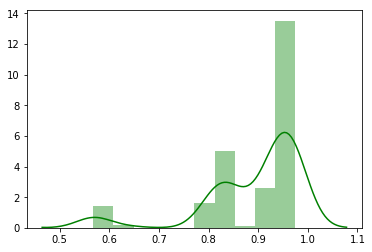

In [185]:
import seaborn as sns
sns.distplot(P_1_4, color="green", label="Bank loan rate")
# plt.legend()

filename = folderFig+'/P14.png'
plt.savefig(filename)
plt.show()

In [144]:
# P_1_2.plot()
# plt.show()
# plt.hist(P_1_2, 50, normed=1, facecolor='green', alpha=0.5);


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


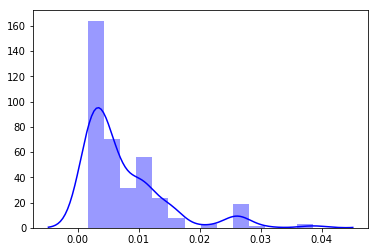

In [180]:
# plt.hist(P_2_2, 50, normed=1, facecolor='blue', alpha=0.5)
sns.distplot(P_2_4, color="blue", label="Bond rate")
filename = folderFig+'/P24.png'
plt.savefig(filename)
plt.show()

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


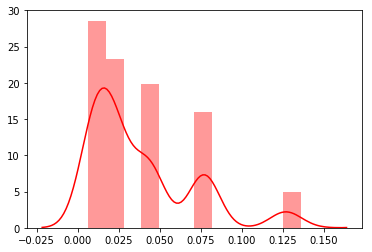

In [181]:
# plt.hist(P_6_2, 50, normed=1, facecolor='red', alpha=0.5)
sns.distplot(P_3_4, color="red", label="FRA")
filename = folderFig+'/P34.png'
# plt.legend()
plt.savefig(filename)
plt.show()

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


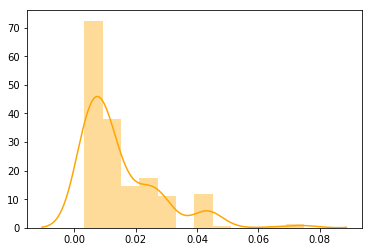

In [168]:
sns.distplot(P_4_4, color="orange")
filename = folderFig+'/P44.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


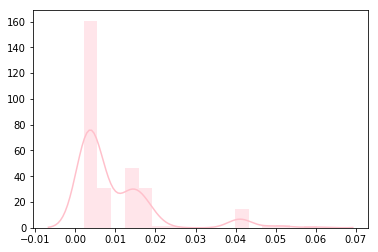

In [182]:
sns.distplot(P_5_4, color="pink", label="WACC")
# plt.legend()
filename = folderFig+'/P54.png'
plt.savefig(filename)
plt.show()



C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


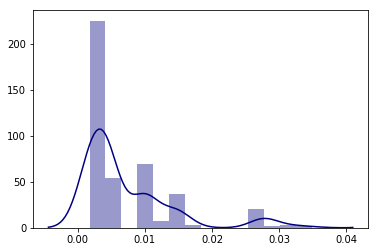

In [183]:
sns.distplot(P_6_4, color="navy", label="CAPM")
# plt.legend()
filename = folderFig+'/P64.png'
plt.savefig(filename)
plt.show()

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


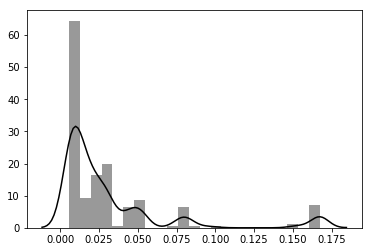

In [184]:
sns.distplot(P_7_4, color="black", label="No model")
# plt.legend()
filename = folderFig+'/P74.png'
plt.savefig(filename)
plt.show()


In [17]:
df4_ex = pd.concat([df_short4, df['no4_1']], axis=1)

In [18]:
df4_ex.head()

,smallcap,largecap,subsidary,equityFunding,debtFunding,no4_1
0,1,0,0,0,0,3
1,0,1,0,1,1,2
2,1,0,0,1,1,3
3,1,0,0,0,1,3
4,1,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
modelno3 = LogisticRegression()
modelno3.fit(X_4,y_train)
predictions = logmodel.predict(X_test)